In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

In [17]:
# Load the dataset 
df = pd.read_csv('framingham.csv')

In [18]:
# Display basic info about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None
   male 

In [19]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean for numeric columns
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Feature selection (we will drop 'TenYearCHD' from the features since it is the target)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardize the data using StandardScaler (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

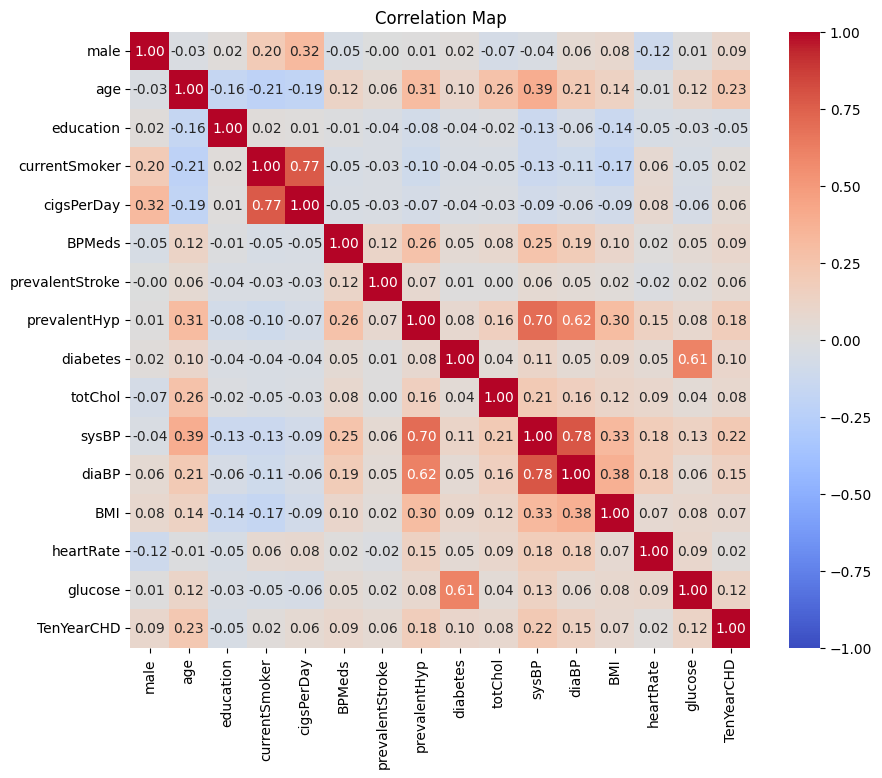

In [20]:
# Correlation Map
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()  # Correlation matrix for the dataset
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Map")
plt.show()


Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       725
         1.0       0.40      0.05      0.09       123

    accuracy                           0.85       848
   macro avg       0.63      0.52      0.50       848
weighted avg       0.79      0.85      0.80       848



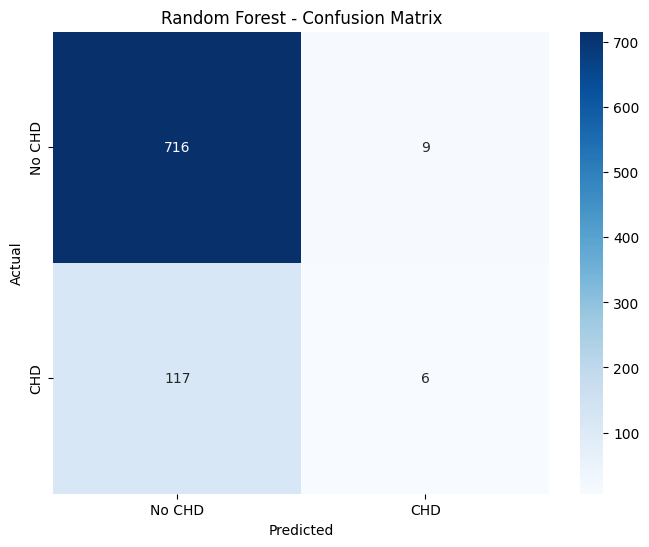


Decision Tree Model:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       725
         1.0       0.16      0.17      0.17       123

    accuracy                           0.75       848
   macro avg       0.51      0.51      0.51       848
weighted avg       0.76      0.75      0.75       848



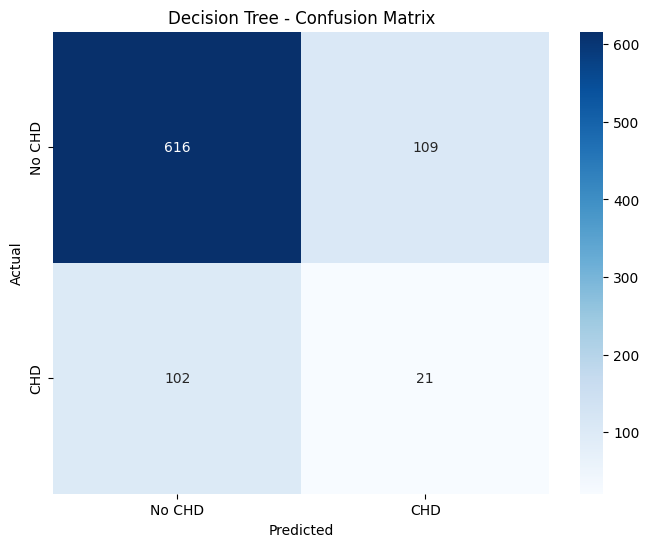


XGBoost Model:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       725
         1.0       0.30      0.11      0.16       123

    accuracy                           0.83       848
   macro avg       0.58      0.53      0.53       848
weighted avg       0.78      0.83      0.80       848



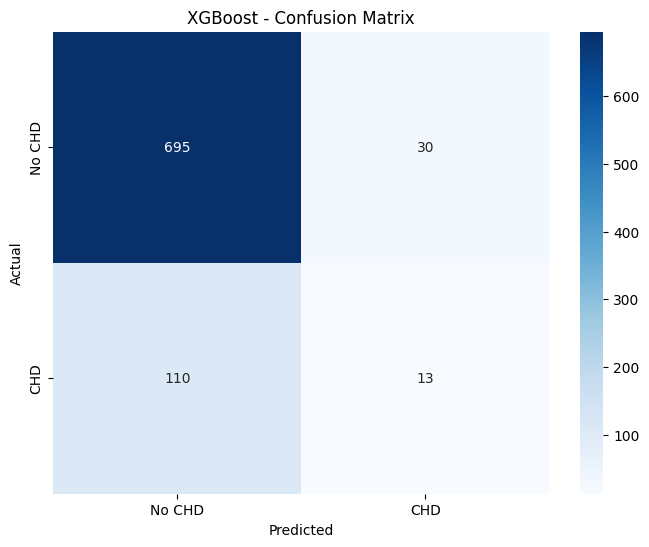


Gradient Boost Model:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       725
         1.0       0.35      0.07      0.11       123

    accuracy                           0.85       848
   macro avg       0.60      0.52      0.51       848
weighted avg       0.79      0.85      0.80       848



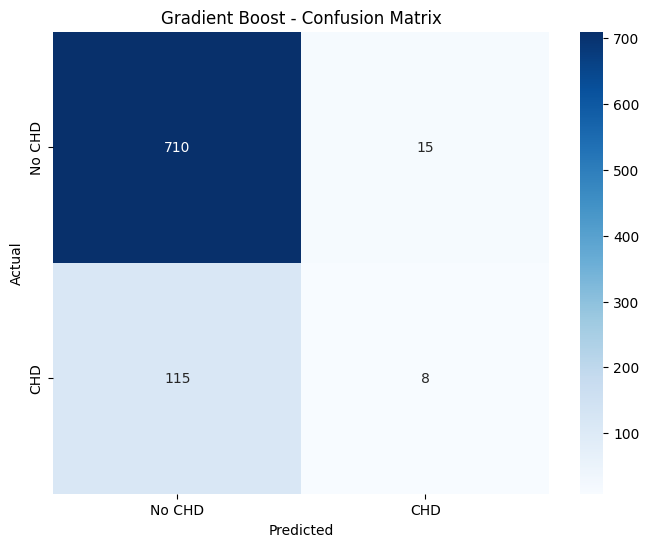

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Model:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       725
         1.0       0.25      0.11      0.16       123

    accuracy                           0.82       848
   macro avg       0.56      0.53      0.53       848
weighted avg       0.77      0.82      0.79       848



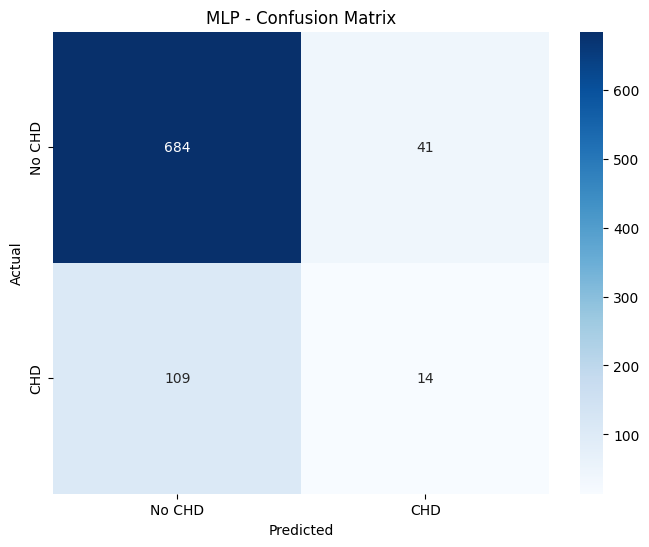

In [25]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Gradient Boost" : GradientBoostingClassifier(random_state=42),
    "MLP" :MLPClassifier((256, ), max_iter=500, random_state=42),
}

# Train and evaluate each model
model_acc = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_acc[model_name] = accuracy
    
    # Evaluate the model
    print(f"\n{model_name} Model:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", 
                cmap="Blues", 
                xticklabels=["No CHD", "CHD"], 
                yticklabels=["No CHD", "CHD"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    


In [26]:
# Report model's accuracy
print('Accuracy report:')
for model_name, accuracy in model_acc.items():
    print(model_name, ' : ', accuracy)


Accuracy report:
Random Forest  :  0.8514150943396226
Decision Tree  :  0.7511792452830188
XGBoost  :  0.8349056603773585
Gradient Boost  :  0.8466981132075472
MLP  :  0.8231132075471698
